# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")

np.random.seed(28)

df = pd.read_csv('previsao_de_renda.csv')
df.pop('Unnamed: 0')

0            0
1            1
2            2
3            3
4            4
         ...  
14995    14995
14996    14996
14997    14997
14998    14998
14999    14999
Name: Unnamed: 0, Length: 15000, dtype: int64

In [2]:
df1 = df[['data_ref', 'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda','estado_civil', 'tipo_residencia','mau']]
df1['data_ref'] = pd.to_datetime(df1['data_ref'])
df1

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,tipo_renda,estado_civil,tipo_residencia,mau
0,2015-01-01,F,False,True,Assalariado,Casado,Casa,False
1,2015-01-01,M,True,True,Empresário,Casado,Casa,False
2,2015-01-01,M,True,True,Assalariado,Casado,Casa,False
3,2015-01-01,F,True,False,Empresário,Casado,Casa,False
4,2015-01-01,M,False,False,Assalariado,Casado,Casa,False
...,...,...,...,...,...,...,...,...
14995,2016-03-01,M,True,True,Assalariado,Casado,Casa,False
14996,2016-03-01,M,True,True,Servidor público,Casado,Estúdio,False
14997,2016-03-01,F,True,True,Assalariado,Casado,Casa,False
14998,2016-03-01,F,False,True,Servidor público,Casado,Casa,False


In [5]:
df2 = df1.copy()

In [13]:
def barras (a):
    ax = sns.countplot(x='data_ref', hue= a, data=df2)
    tick_labs = df2['data_ref'].dt.strftime("%Y-%m-%d").unique()
    ax.set_xticks(range(len(tick_labs)))
    ax.set_xticklabels(tick_labs, rotation=90)
    plt.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.)
    return plt.show()

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

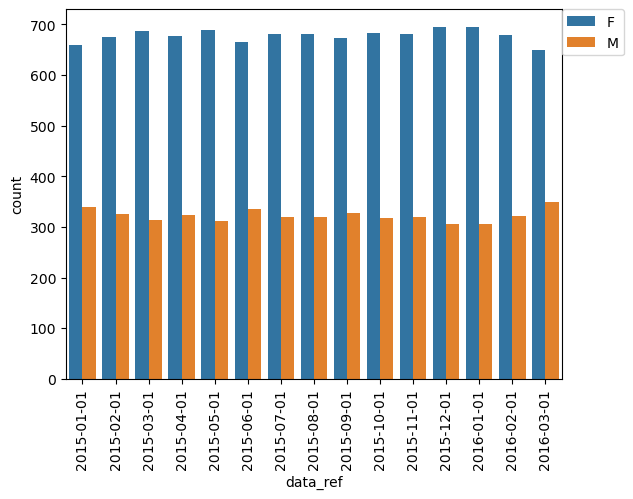

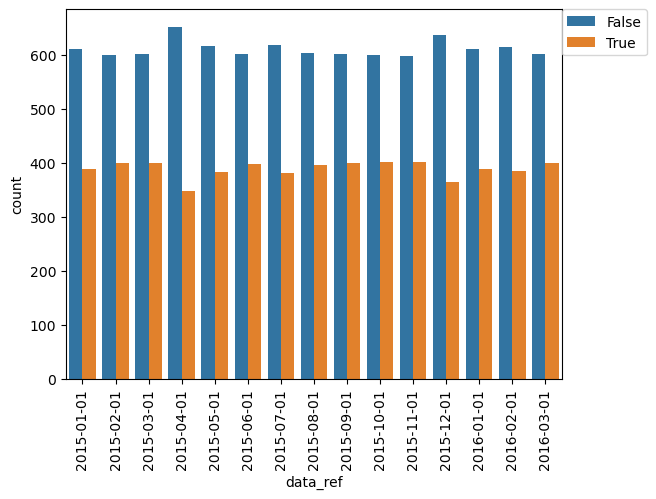

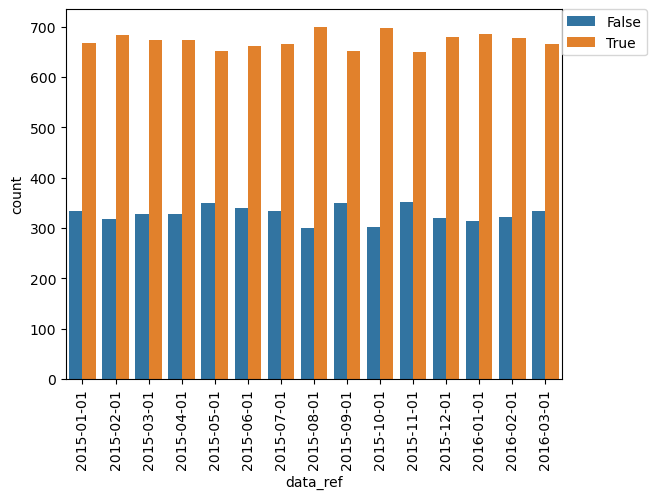

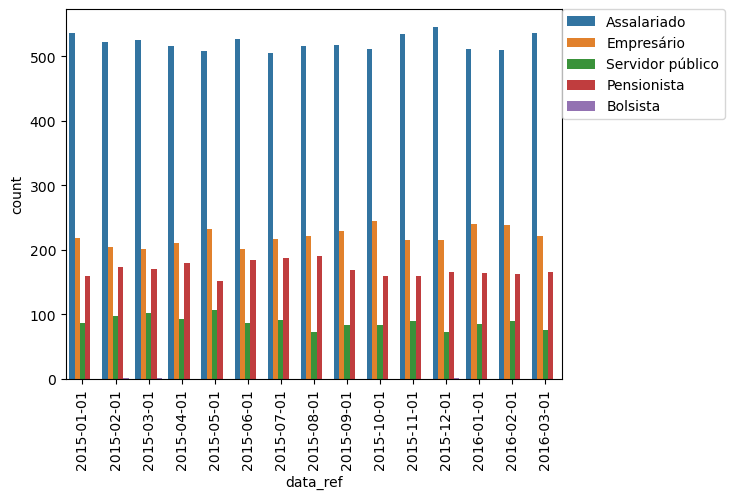

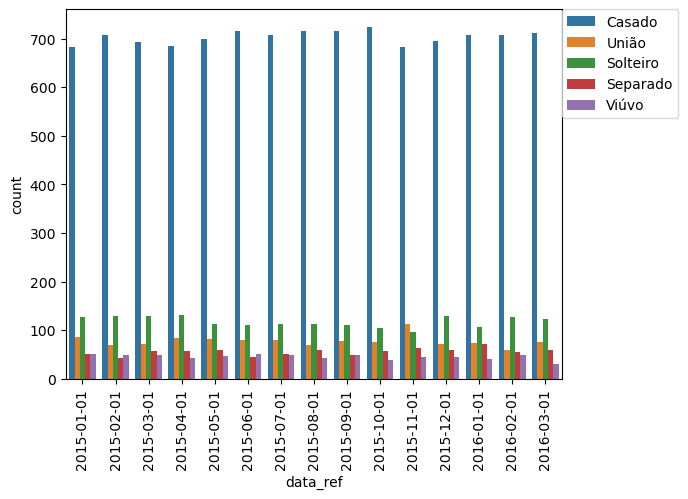

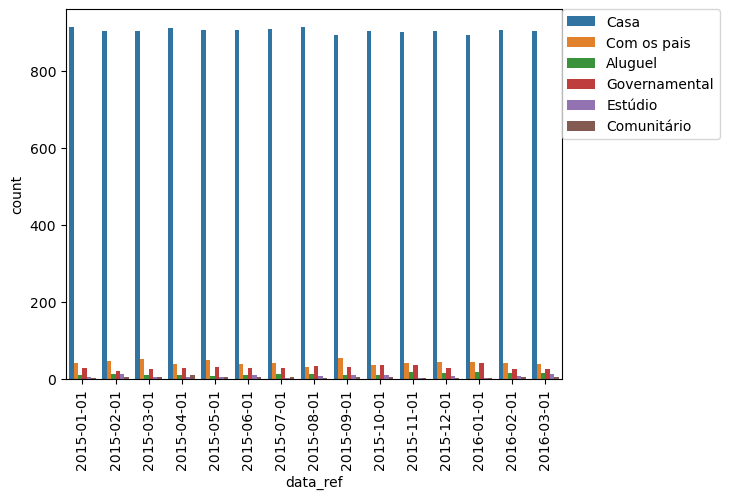

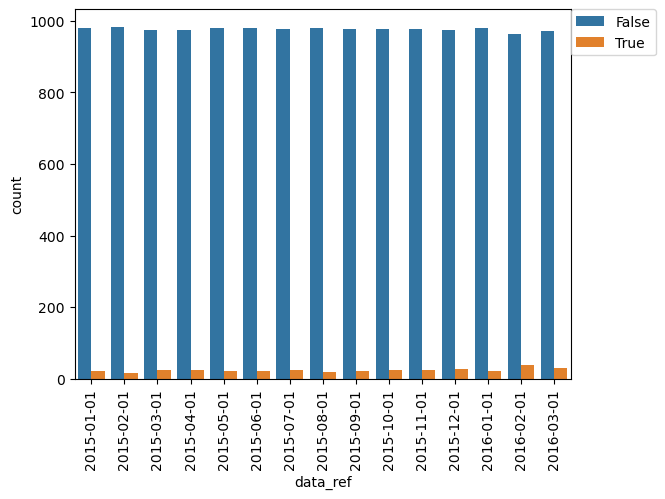

In [21]:
sexo = barras(a = 'sexo')
veiculo = barras(a = 'posse_de_veiculo')
imovel = barras(a = 'posse_de_imovel')
renda = barras(a = 'tipo_renda')
casado = barras(a = 'estado_civil')
residencia = barras(a = 'tipo_residencia')
mau = barras(a = 'mau')




2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

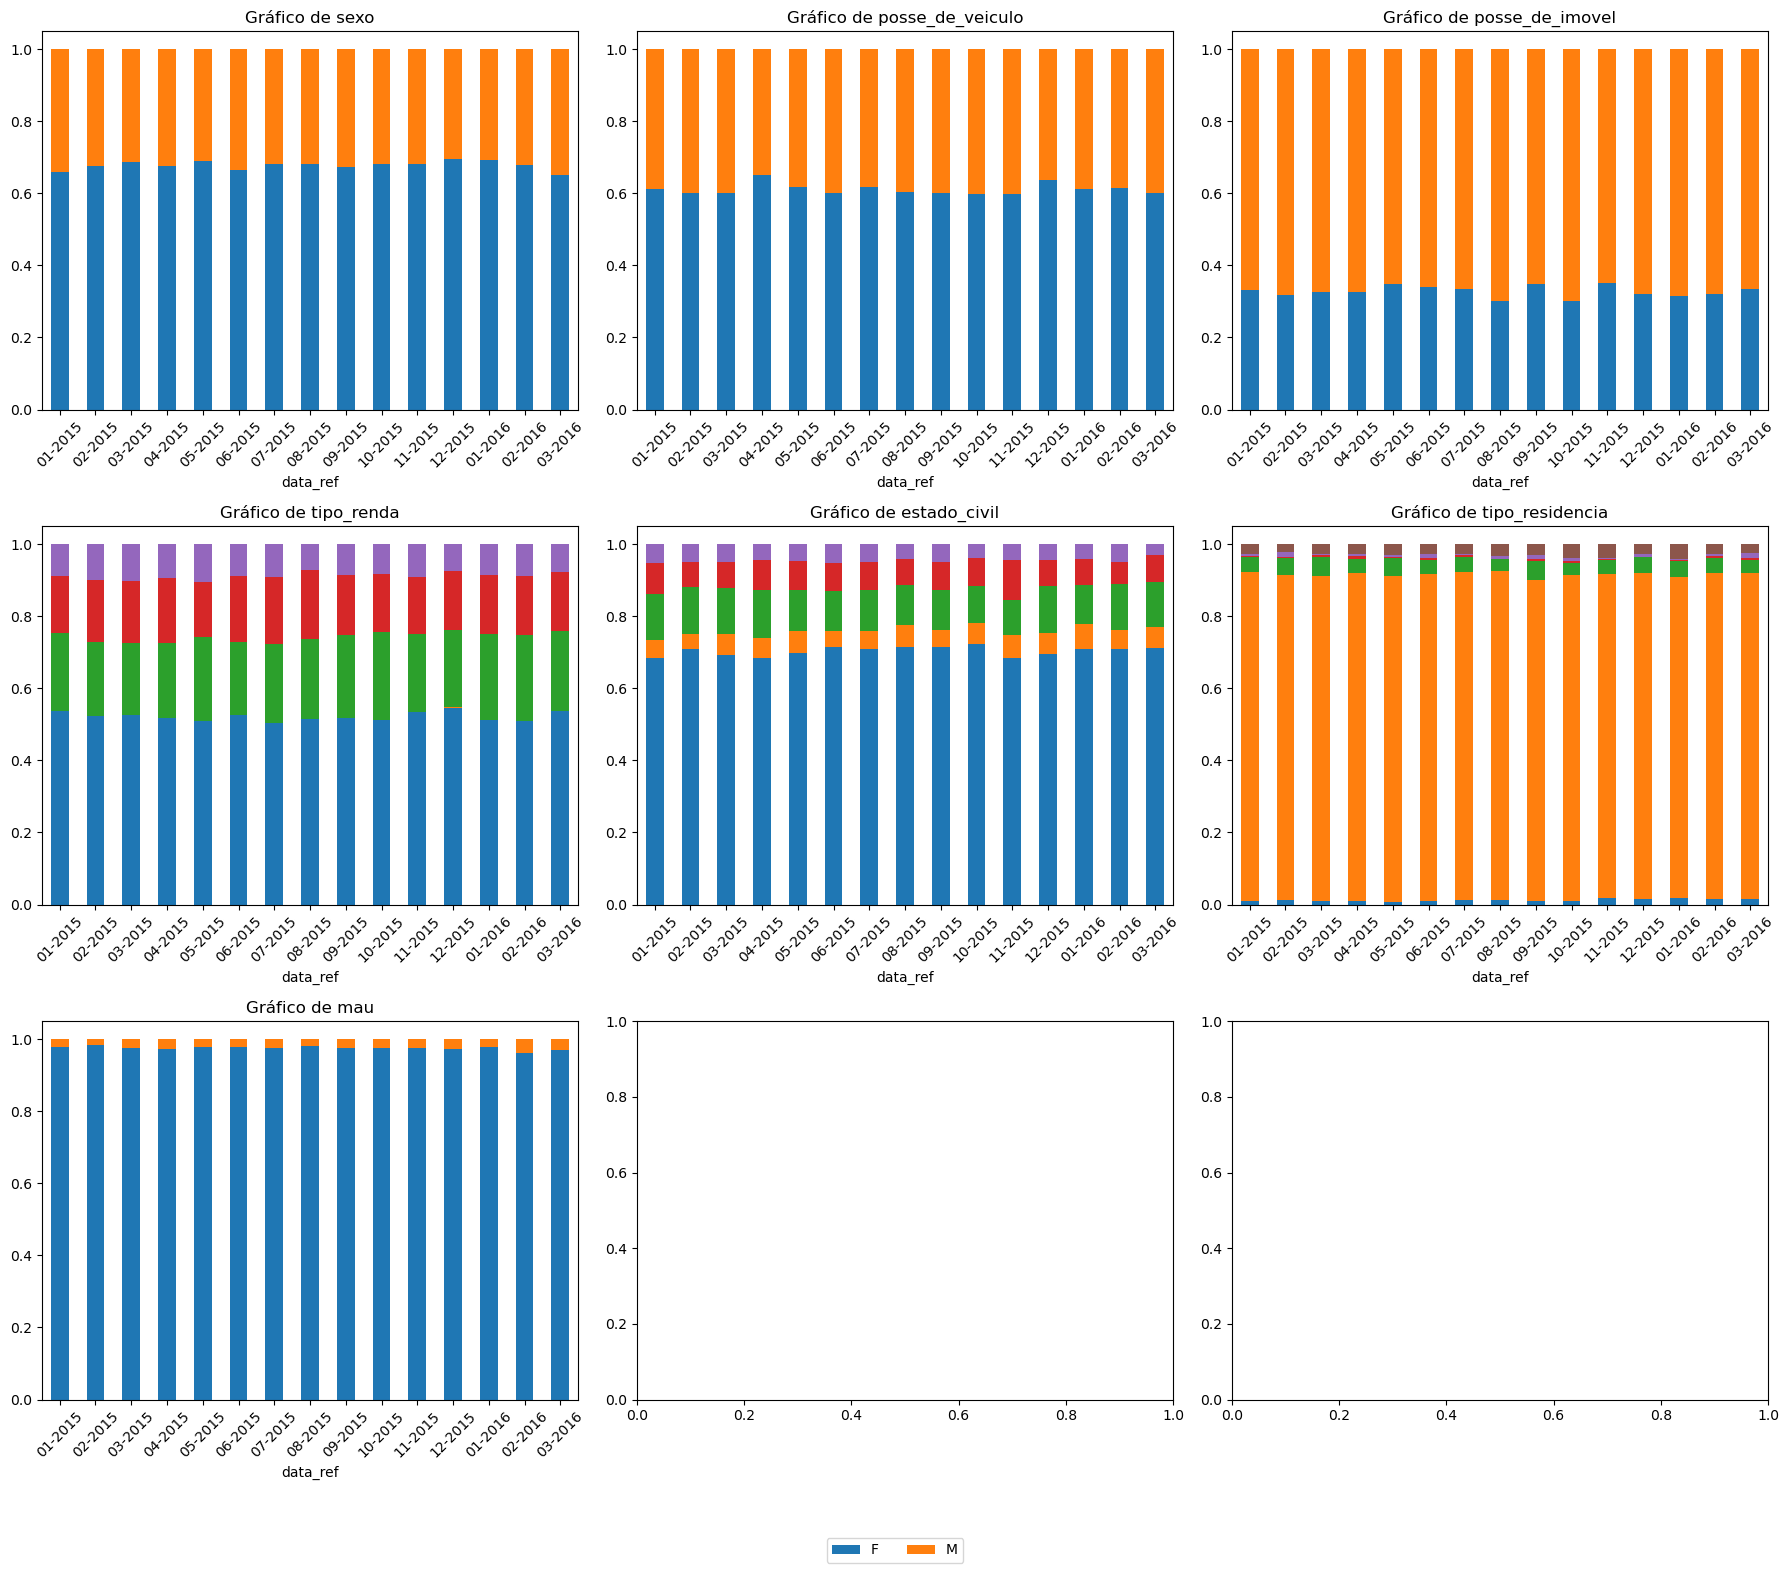

In [23]:
# Configurar o tamanho do canvas para gráficos
fig, axes = plt.subplots(3, 3, figsize=(18, 15))  # 3 linhas, 3 colunas (mais espaço)

# Lista de colunas para plotar (excluindo a última linha vazia, pois você tem 7 colunas)
columns = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'estado_civil', 'tipo_residencia', 'mau']

# Criar gráficos para cada coluna
for col, ax in zip(columns, axes.flatten()[:len(columns)]):  # Ajuste para o número de colunas
    # Usar groupby e value_counts(normalize=True) para calcular proporções
    tab = (
        df2.groupby('data_ref')[col]
        .value_counts(normalize=True)
        .unstack(fill_value=0)
    )

    # Plotar gráfico de barras empilhadas
    tab.plot(kind='bar', stacked=True, ax=ax, legend=False)
    ax.set_title(f'Gráfico de {col}')
    ax.set_xticklabels(
        df2['data_ref'].dt.strftime("%m-%Y").unique(),
        rotation=45
    )

# Ajustar o layout
fig.tight_layout()

# Adicionar uma legenda única para todos os gráficos
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=7)

# Mostrar os gráficos
plt.show()
